In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import seaborn as sns
import glob
import warnings
warnings.filterwarnings('ignore')
sns.set(rc={"figure.dpi":1200})
sns.set_context('notebook')
sns.set_style("ticks")
mpl.style.use('default')
mpl.rcParams['axes.linewidth'] = 7 #set the value globally
mpl.rcParams['xtick.major.size'] = 20
mpl.rcParams['xtick.major.width'] = 7
mpl.rcParams['xtick.minor.size'] = 10
mpl.rcParams['xtick.minor.width'] = 7
mpl.rcParams['ytick.major.size'] = 20
mpl.rcParams['ytick.major.width'] = 7
mpl.rcParams['ytick.labelsize'] = 50
mpl.rcParams['xtick.labelsize'] = 50
mpl.rcParams['ytick.minor.size'] = 10
mpl.rcParams['ytick.minor.width'] = 7
mpl.rcParams['font.size'] = 50
mpl.rcParams['font.sans-serif']='Arial'


In [2]:
df = pd.read_csv('HIF1A_osmotic_perturbations_CONCATENATED.csv')
##FILTERS
df = df[(df['log directA_before'] > 3.5) & (df['log directA_before'] < 4.4)]
df = df[df['IDR'].astype(str).isin(['1', '2','3', '4','5','24'])]

df = df[(df['log directA_before']>3.5) & (df['log directA_before']<4.4)]
df = df[(df['d_directA']<1000)]
df = df.sort_values(by=['IDR','condition'],ascending=[True,True])

###ADD the corresponding mutation name to the ID##
#mapping = {1:'NQ>W', 2: 'MA>W', 3: 'WT', 4:'supercharge6', 5: 'RK>D', 8: 'L>F', 10: 'WT', 12: 'RK>A', 24: 'GS24'}

# Mapping dictionary
mapping = {1:'NQ>W', 2: 'MA>W', 3: 'WT', 4:'RK>E', 5: 'RK>D', 24:'GS24'}

# Convert 'IDR' column to numeric values
df['IDR'] = pd.to_numeric(df['IDR'])

# Create a new column 'Mut Name' using the 'IDR' column and the mapping dictionary
df['mut name'] = df['IDR'].map(mapping)

df

,Unnamed: 0,IDR,date,condition,well,area_before,D_before,A_before,D_before std,A_before std,...,log directA_after,A_corr_before,D/A_corr_before,A_corr_after,D/A_corr_after,Ef_before,Ef_after,delta Ef,d_directA,mut name
0,4,1,230323,100,C1_1_230323,534.040,3320.907,7116.076,1387.157,3211.055,...,3.596680,4549.37556,0.729970,4407.98538,0.684914,0.578045,0.593502,0.015457,294.612,NQ>W
1,8,1,230323,100,C1_1_230323,974.285,9939.177,23914.559,6213.401,15352.705,...,4.011776,16661.18727,0.596547,16640.44161,0.605686,0.626352,0.622787,-0.003565,175.717,NQ>W
2,9,1,230323,100,C1_1_230323,498.761,2875.358,5988.528,1139.064,2439.414,...,3.512138,3764.99059,0.763709,3447.31081,0.717728,0.566987,0.582164,0.015178,430.189,NQ>W
3,11,1,230323,100,C1_1_230323,635.968,6079.286,18552.928,3156.144,10048.841,...,3.991252,13423.99973,0.452867,13333.24579,0.449854,0.688294,0.689725,0.001430,235.762,NQ>W
4,12,1,230323,100,C1_1_230323,821.023,5557.146,10401.568,4169.535,7201.877,...,3.706841,6457.44549,0.860580,6399.01639,0.843933,0.537467,0.542319,0.004852,165.588,NQ>W
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26416,5985,24,230811,750,A4_24_230811,738.741,3476.550,4912.134,1226.900,1723.915,...,3.515609,2423.97005,1.434238,2333.70388,1.452285,0.410806,0.407783,-0.003023,119.855,GS24
26417,5987,24,230811,750,A4_24_230811,658.361,5879.095,11161.285,4565.363,8851.562,...,3.834075,6704.61882,0.876872,7659.25455,0.620209,0.532801,0.617204,0.084403,231.995,GS24
26418,5994,24,230811,750,A4_24_230811,1030.266,3362.895,4662.429,1625.246,2183.899,...,3.483237,2278.27744,1.476069,2175.90177,1.502681,0.403866,0.399571,-0.004295,124.911,GS24
26419,6001,24,230811,750,A4_24_230811,663.536,4756.043,7041.000,2538.273,3851.297,...,3.675030,3607.17564,1.318495,3760.63595,1.204190,0.431314,0.453681,0.022367,74.061,GS24


In [3]:
# Calculate median 'delta Ef' for each 'replicate' of each 'condition' for each 'mut name'
df_median = df.groupby(['mut name', 'condition', 'well'])['delta Ef'].median().reset_index()

# Rename 'delta Ef' column to 'median delta Ef'
df_median.rename(columns={'delta Ef': 'median delta Ef'}, inplace=True)

# Calculate standard deviation of 'median delta Ef' for each 'condition' for each 'mut name'
df_std = df_median.groupby(['mut name', 'condition'])['median delta Ef'].std().reset_index()

# Rename 'median delta Ef' column to 'std dev delta Ef'
df_std.rename(columns={'median delta Ef': 'std dev delta Ef'}, inplace=True)

# Merge df_median and df_std
df_final = pd.merge(df_median, df_std, on=['mut name', 'condition'], how='left')

# Print the final DataFrame
#print(df_final)

# Calculate average 'median delta Ef' for each 'condition' for each 'mut name'
df_mean = df_final.groupby(['mut name', 'condition'])['median delta Ef'].mean().reset_index()

# Rename 'median delta Ef' column to 'average median delta Ef'
df_mean.rename(columns={'median delta Ef': 'average median delta Ef'}, inplace=True)

# Calculate standard deviation of 'average median delta Ef' for each 'condition' for each 'mut name'
df_std = df_final.groupby(['mut name', 'condition'])['median delta Ef'].std().reset_index()

# Rename 'median delta Ef' column to 'std dev average median delta Ef'
df_std.rename(columns={'median delta Ef': 'std dev average median delta Ef'}, inplace=True)

# Merge df_mean and df_std
df_final_avg = pd.merge(df_mean, df_std, on=['mut name', 'condition'], how='left')

# Print the final DataFrame
print(df_final_avg)
df_final_avg

   mut name  condition  average median delta Ef  \
0      GS24        100                -0.002709   
1      GS24        300                -0.001543   
2      GS24        750                 0.039972   
3      MA>W        100                -0.001331   
4      MA>W        300                -0.001212   
5      MA>W        750                 0.010413   
6      NQ>W        100                 0.002888   
7      NQ>W        300                -0.002188   
8      NQ>W        750                -0.004532   
9      RK>D        100                 0.000119   
10     RK>D        300                -0.001750   
11     RK>D        750                 0.052758   
12     RK>E        100                 0.007839   
13     RK>E        300                -0.003184   
14     RK>E        750                 0.037092   
15       WT        100                -0.002904   
16       WT        300                -0.001695   
17       WT        750                 0.049370   

    std dev average median del

,mut name,condition,average median delta Ef,std dev average median delta Ef
0,GS24,100,-0.002709,0.013110
1,GS24,300,-0.001543,0.000909
2,GS24,750,0.039972,0.006670
3,MA>W,100,-0.001331,0.002297
4,MA>W,300,-0.001212,0.001318
5,MA>W,750,0.010413,0.006453
6,NQ>W,100,0.002888,0.002958
7,NQ>W,300,-0.002188,0.001637
8,NQ>W,750,-0.004532,0.003170
9,RK>D,100,0.000119,0.005571


In [4]:
# Filter df_final_avg for 'condition' 750 and 100
df_750 = df_final_avg[df_final_avg['condition'] == 750]
df_300 = df_final_avg[df_final_avg['condition'] == 300]

# Set 'mut name' as the index for easy subtraction
df_750.set_index('mut name', inplace=True)
df_300.set_index('mut name', inplace=True)

# Calculate the absolute difference in 'average median delta Ef' between 'condition' 750 and 100 for each 'mut name'
df_diff = (df_750['average median delta Ef'] - df_300['average median delta Ef']).abs()

# Calculate the propagated standard error
df_error = (df_750['std dev average median delta Ef']**2 + df_300['std dev average median delta Ef']**2)**0.5

# Create the sensitivity DataFrame
sensitivity = pd.DataFrame({'absolute difference': df_diff, 'propagated_SE': df_error})

# Reset the index
sensitivity.reset_index(inplace=True)

# Print the sensitivity DataFrame
print(sensitivity)


  mut name  absolute difference  propagated_SE
0     GS24             0.041515       0.006732
1     MA>W             0.011625       0.006586
2     NQ>W             0.002344       0.003568
3     RK>D             0.054507       0.013452
4     RK>E             0.040276       0.012987
5       WT             0.051065       0.012275


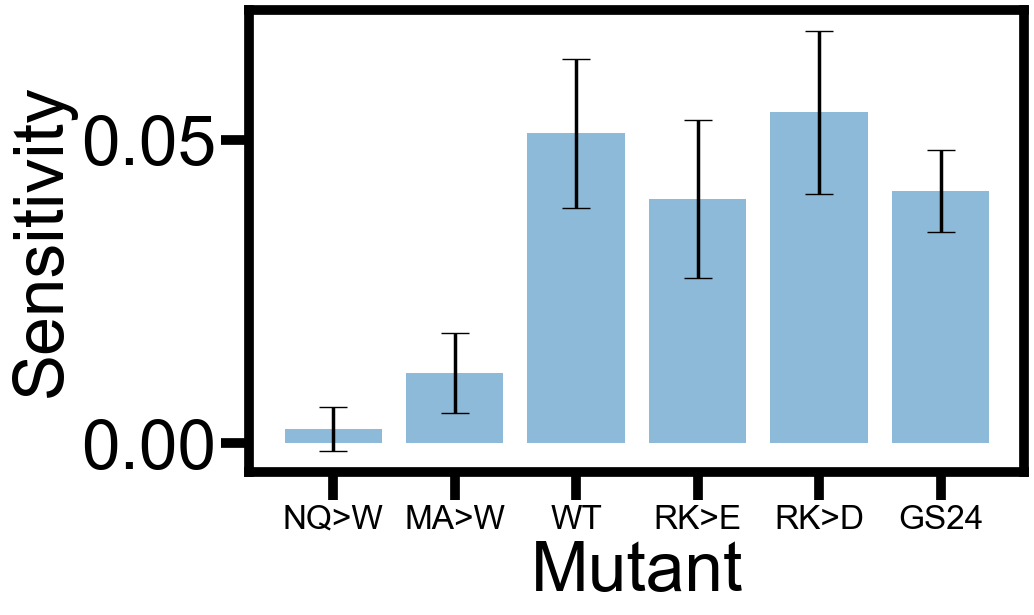

In [5]:
# Define your desired order
order = ['NQ>W', 'MA>W', 'WT', 'RK>E', 'RK>D', 'GS24']

# Reorder the dataframe according to the desired order
sensitivity = sensitivity.set_index('mut name').loc[order].reset_index()

# Create a figure and a subplots axis
fig, ax = plt.subplots(figsize=(10,6))

# Generate the bar plot with error bars
ax.bar(sensitivity['mut name'], sensitivity['absolute difference'], 
       yerr=sensitivity['propagated_SE'], align='center', alpha=0.5, ecolor='black', capsize=10,error_kw={'elinewidth':2.5})
ax.tick_params(axis='x', labelsize=24)  # Change 'labelsize' to your desired font size

# Add labels and title
plt.xlabel('Mutant')
plt.ylabel('Sensitivity')


# Display the plot
plt.show()


In [6]:
##IMPORT ACTIVITY
activity = pd.read_csv('Shahar_ADvariants_20211203.csv')
activity = activity[activity['ID'].isin([1, 2, 3, 4, 5])]
activity = activity.drop(columns=['norm_error','start','end'])
activity= activity.rename(columns={'MutName': 'mut name'})
activity['Activity_Mean_MSS18'] = activity['Activity_Mean_MSS18'] - 2000
activity['mut name'] = activity['mut name'].replace('supercharge6', 'RK>E')

wt_value = activity.loc[activity['mut name'] == 'WT', 'Activity_Mean_MSS18'].iloc[0]

# Create a new column 'normalized activity' by dividing 'Activity_Mean_MSS18' by the WT value
activity['normalized activity'] = activity['Activity_Mean_MSS18'] / wt_value
# Find the standard deviation value for the 'WT' mut name
wt_std = activity[activity['mut name'] == 'WT']['Activity_std_MSS18'].iloc[0]

# Calculate the normalized error
activity['normalized error'] = ((activity['Activity_std_MSS18'] / activity['Activity_Mean_MSS18'])**2 + 
                                (wt_std / wt_value)**2)**0.5 * activity['normalized activity']

activity

,ID,Gene,ADseq,Activity_Mean_MSS18,Activity_std_MSS18,mut name,normalized activity,normalized error
0,1,Hif1-AD2_46,RLLGWSMDESGLPWLTSYDCEVWAPIWGSRWLLWGEELLRALDWVW,103.122677,576.329705,NQ>W,0.148193,0.830047
1,2,Hif1-AD2_46,RLLGQSWDESGLPQLTSYDCEVNWPIQGSRNLLQGEELLRWLDQVN,111.794463,189.483389,MA>W,0.160655,0.278762
2,3,Hif1-AD2_46,RLLGQSMDESGLPQLTSYDCEVNAPIQGSRNLLQGEELLRALDQVN,695.866145,258.490579,WT,1.000000,0.525332
3,4,Hif1-AD2_46,ELLGQSMDESGLPQLTSYDCEVNAPIQGSEFLLQGEELLDALDQVN,2746.673271,996.520233,RK>E,3.947129,2.049537
4,5,Hif1-AD2_46,DLLGQSMDESGLPQLTSYDCEVNAPIQGSDNLLQGEELLDALDQVN,2858.260837,808.684618,RK>D,4.107487,1.917962


In [7]:
sensitivity = sensitivity[sensitivity['mut name'] != 'GS24']
sensitivity

,mut name,absolute difference,propagated_SE
0,NQ>W,0.002344,0.003568
1,MA>W,0.011625,0.006586
2,WT,0.051065,0.012275
3,RK>E,0.040276,0.012987
4,RK>D,0.054507,0.013452


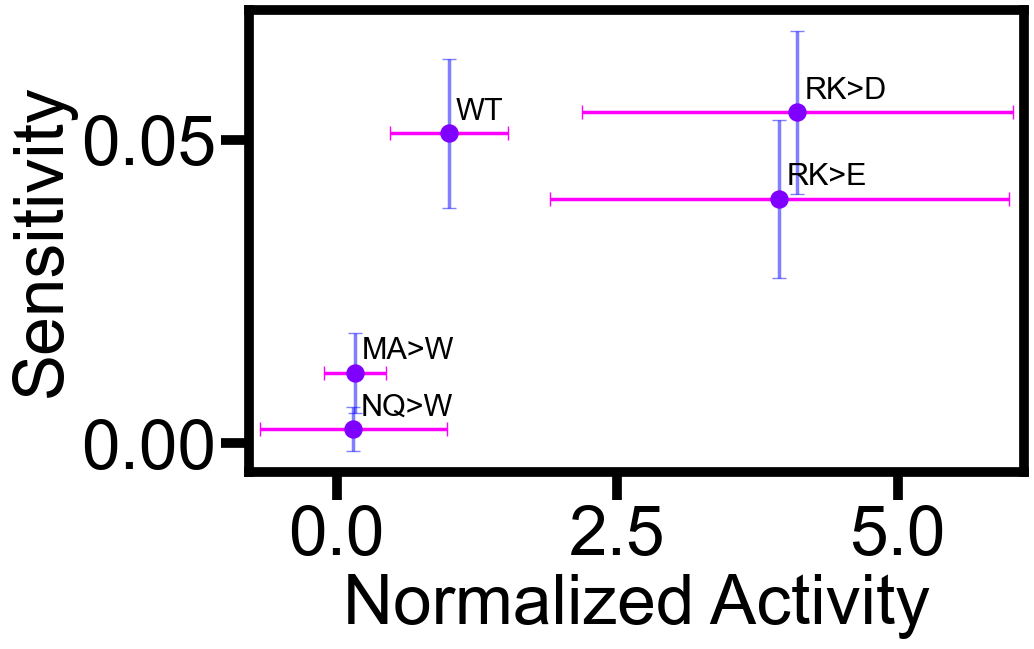

In [8]:
# Let's correct the alignment issue and apply the color and size specifications to the error bars and scatter points.

# Assuming 'sensitivity' and 'activity' DataFrames are defined and 'GS24' has been removed from 'sensitivity'
# We will align the activity DataFrame to match the sensitivity DataFrame
activity_aligned = activity[activity['mut name'].isin(sensitivity['mut name'])].reset_index(drop=True)

# Define colors for the error bars
error_color_y = 'blue'    # Vertical error bar
error_color_x = 'magenta' # Horizontal error bar

# Define the color for the scatter points by mixing blue and magenta (RGB)
scatter_color = (np.array([0, 0, 1]) + np.array([1, 0, 1])) / 2

# Create a figure and a subplots axis
fig, ax = plt.subplots(figsize=(10,6))

# Generate the scatter plot with error bars
# Note that we need to set the 'ecolor' as a single value if we want to apply alpha
# Therefore, we'll plot the error bars in two steps to have them in different colors
# First plot the y-error (vertical) with the specified alpha
ax.errorbar(activity_aligned['normalized activity'], sensitivity['absolute difference'],
            yerr=sensitivity['propagated_SE'], fmt='o', color=scatter_color,
            ecolor=error_color_y, elinewidth=2.5, capsize=5, alpha=0.5)

# Then plot the x-error (horizontal) without alpha
ax.errorbar(activity_aligned['normalized activity'], sensitivity['absolute difference'],
            xerr=activity_aligned['normalized error'], fmt='o', color=scatter_color,
            ecolor=error_color_x, elinewidth=2.5, capsize=5)

# Increase the size of the scatter points
ax.scatter(activity_aligned['normalized activity'], sensitivity['absolute difference'],
           color=scatter_color, s=150,zorder=2)  # `s` is the size of the scatter point

# Label each scatter point with its 'mut name'
for i in range(len(activity_aligned)):
    ax.annotate(activity_aligned['mut name'][i],
                (activity_aligned['normalized activity'][i], sensitivity['absolute difference'][i]),
                textcoords="offset points", # how to position the text
                xytext=(5,10), # distance from text to points (x,y)
                ha='left',fontsize=22,zorder=3) # horizontal alignment can be left, right or center

# Set axis labels
plt.xlabel('Normalized Activity')
plt.ylabel('Sensitivity')
plt.xlim(-.78,6.13)
# Display the plot
plt.show()
